# Question 1
Analysis 1:

Analysis on sent mail by Enron employees

In [1]:
#import statements

import glob
import email
from email.parser import Parser
import string
import nltk
from nltk.corpus import stopwords
import re
from nltk import FreqDist

#For this analysis we focus only on the sent mail folder
read_files=glob.glob("/Users/vega/Downloads/maildir/*/_sent_mail/*")
        
#Function to get sender
def get_Sender(emailText):
    parser = Parser()
    email = parser.parsestr(emailText) 
    f= email.get('From')   
    sender = str(f)
    return sender


In [2]:
#Get the content from the files using email parser
contentList = []
cd = []
for k in read_files:
        with open(k, "r") as infile:
            emailText = infile.read()
            s = get_Sender(emailText)
            contentList.append(s)
for l in contentList:
    s = l.split()
    cd.append(s)

In [3]:
import itertools
merged = list(itertools.chain.from_iterable(cd))
filtered_words = [w for w in merged if not w in stopwords.words('english')]


In [4]:
# Get frequency of mail senders.

fd = FreqDist(filtered_words)    
topSender = fd.most_common(10)
topSenders = [t[0] for t in topSender]
topSenderFreq = [t[1] for t in topSender]

print("The top email senders in descending order are :")
for t in topSenders:
    v = t.split("@")[0].replace('.', ' ')
    print(v)

The top email senders in descending order are :
kay mann
vince kaminski
chris germany
eric bass
kate symes
drew fossum
sally beck
susan scott
phillip love
benjamin rogers


In [5]:
# Create two lists for csv input

freq_list = []
value = 1
for word in fd.keys():
    freq_list.append([value, fd[word]])
    value += 1
freq_list

noOfEmployee = [r[0] for r in freq_list]
freqs = [f[1] for f in freq_list]


In [9]:
# Create csv file

import csv
a = [['Employee Number','No of Mails sent']]
path = "Processed Data"
with open(path+'\\'+'outputQues1-a1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerows(a)
    writer.writerows(freq_list)

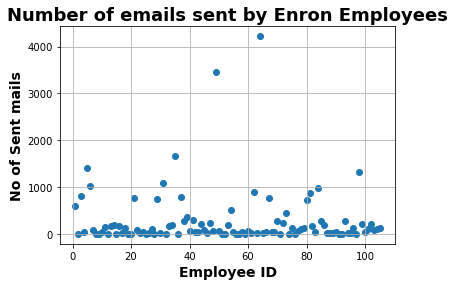

In [10]:
# create matplot lib chart to display number of emails sent

import matplotlib.pyplot as plt      
plt.scatter(noOfEmployee,freqs)
plt.title('Number of emails sent by Enron Employees', fontsize=18, fontweight='bold')
plt.xlabel('Employee ID', fontsize=14, fontweight='bold')
plt.ylabel('No of Sent mails', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

- Above graph shows us very few outliers. Thereby bringing us to the conclusion that very few employees 
have sent a large amount of emails above 1000. The top mail senders based on the sent mail folder are : kay mann, vince kaminski, chris germany, eric bass and kate symes.